In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
#import plotly.express as px
#import statsmodels.api as sm
#from itertools import product
#from tqdm import tqdm
warnings.filterwarnings('ignore')
date_cols = ['date']

In [2]:
df = pd.read_csv(r'C:\Users\Divyanshu Chaudhari\Downloads\country_vaccinations_new.csv',parse_dates = date_cols)

In [3]:
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
18759,Zimbabwe,ZWE,2021-05-14,775241.0,571460.0,203781.0,23221.0,19211.0,5.22,3.84,1.37,1293.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1394757158...
18760,Zimbabwe,ZWE,2021-05-15,793311.0,579769.0,213542.0,18070.0,19353.0,5.34,3.90,1.44,1302.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1394757158...
18761,Zimbabwe,ZWE,2021-05-16,796947.0,581615.0,215332.0,3636.0,16101.0,5.36,3.91,1.45,1083.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1394757158...
18762,Zimbabwe,ZWE,2021-05-17,814258.0,591808.0,222450.0,17311.0,17658.0,5.48,3.98,1.50,1188.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1394757158...
18763,Zimbabwe,ZWE,2021-05-18,831954.0,600579.0,231375.0,17696.0,17455.0,5.60,4.04,1.56,1174.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1394757158...


In [4]:
df.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


# Data Cleaning

In [5]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [6]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                      7969
people_vaccinated                       8726
people_fully_vaccinated                11097
daily_vaccinations_raw                  9766
daily_vaccinations                       213
total_vaccinations_per_hundred          7969
people_vaccinated_per_hundred           8726
people_fully_vaccinated_per_hundred    11097
daily_vaccinations_per_million           213
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [7]:
df.shape

(18764, 15)

In [8]:
#Droppin total_vaccinations missing data, as without this value any raw doesn't make much sense.
df = df.drop(df[df.total_vaccinations.isna()].index)

In [9]:
df.shape

(10795, 15)

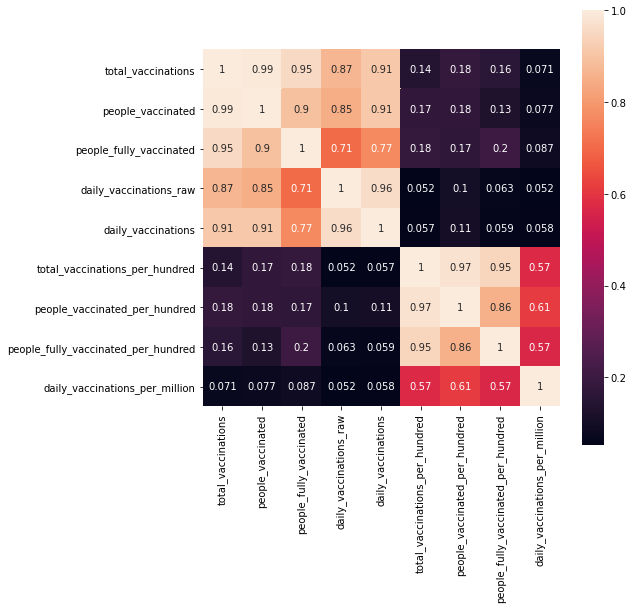

In [10]:
plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, square=True)
plt.show()

The values of total_vaccinations column are strongly correlated with people_vaccinated column's.4

In [11]:
df.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                       844
people_fully_vaccinated                3129
daily_vaccinations_raw                 1797
daily_vaccinations                      211
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred           844
people_fully_vaccinated_per_hundred    3129
daily_vaccinations_per_million          211
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [12]:
#df_copy = df.copy()

In [13]:
#df_copy = df_copy.drop(df_copy[df_copy.people_vaccinated.isna()].index)

In [14]:
#Let's check the hypothesis that these columns distributions are the same.
#We will use Mann-Whithey U test for this goal.

In [15]:
scipy.stats.mannwhitneyu(df.total_vaccinations, df.people_vaccinated, alternative='two-sided')

MannwhitneyuResult(statistic=56890750.5, pvalue=0.0026695698080454987)

As p-value is less than 0.05, which means we reject our hyphotesis.
So, we will fill the missing values with 0.

In [16]:
df.people_vaccinated = df.people_vaccinated.fillna(0)

In [17]:
df.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                3129
daily_vaccinations_raw                 1797
daily_vaccinations                      211
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred           844
people_fully_vaccinated_per_hundred    3129
daily_vaccinations_per_million          211
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Other Strong correlations that we identify from the above heatmap are:

2.total_vaccinations_per_hundred vs people_vaccinated_per_hundred
3.daily_vaccinations vs  people_vaccinated
4.daily_vaccinations_per_million vs people_vaccinated_per_hundred
5.people_fully_vaccinated vs  total_vaccinations
6.people_fully_vaccinated_per_hundred vs total_vaccinations_per_hundred
7.daily_vaccinations_raw vs daily_vaccinations

In [18]:
scipy.stats.mannwhitneyu(df.total_vaccinations_per_hundred, df.people_vaccinated_per_hundred, alternative='two-sided')

MannwhitneyuResult(statistic=57905856.5, pvalue=0.4315482792032509)

In [19]:
#df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.fillna(0)
diff_per_hundred = df.total_vaccinations_per_hundred.mean() - df.people_vaccinated_per_hundred.mean()
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.fillna(df.total_vaccinations_per_hundred - diff_per_hundred)

In [20]:
scipy.stats.mannwhitneyu(df.daily_vaccinations, df.people_vaccinated, alternative='two-sided')

MannwhitneyuResult(statistic=29366750.0, pvalue=0.0)

In [21]:
df.daily_vaccinations = df.daily_vaccinations.fillna(0)

In [22]:
scipy.stats.mannwhitneyu(df.daily_vaccinations_per_million, df.people_vaccinated_per_hundred, alternative='two-sided')

MannwhitneyuResult(statistic=114912595.5, pvalue=0.0)

In [23]:
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.fillna(0)

In [24]:
scipy.stats.mannwhitneyu(df.people_fully_vaccinated, df.total_vaccinations, alternative='two-sided')

MannwhitneyuResult(statistic=66328301.0, pvalue=2.169668356818736e-69)

In [25]:
df.people_fully_vaccinated = df.people_fully_vaccinated.fillna(0)

In [26]:
scipy.stats.mannwhitneyu(df.people_fully_vaccinated_per_hundred, df.total_vaccinations_per_hundred, alternative='two-sided')

MannwhitneyuResult(statistic=62889277.0, pvalue=5.70888857535949e-24)

In [27]:
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.fillna(0)

In [28]:
scipy.stats.mannwhitneyu(df.daily_vaccinations_raw, df.daily_vaccinations, alternative='two-sided')

MannwhitneyuResult(statistic=70580864.0, pvalue=2.5516766302881847e-159)

In [29]:
df.daily_vaccinations_raw = df.daily_vaccinations_raw.fillna(0)

In [30]:
df.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [31]:
df.shape

(10795, 15)

In [32]:
df.dtypes

country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
dtype: object

# Forecasting Starts

In [33]:
t_cols = ['date','total_vaccinations']
timeseries = df[t_cols].groupby('date').sum()[4:-1]
timeseries = pd.DataFrame(timeseries)
print(timeseries)

            total_vaccinations
date                          
2020-12-06        2.000000e+00
2020-12-07        4.000000e+00
2020-12-08        4.000000e+00
2020-12-09        5.000000e+00
2020-12-10        6.000000e+00
...                        ...
2021-05-13        1.394810e+09
2021-05-14        1.376011e+09
2021-05-15        1.380323e+09
2021-05-16        1.465803e+09
2021-05-17        1.497409e+09

[163 rows x 1 columns]


In [34]:
#timeseries = timeseries.set_index('date')
timeseries.shape

(163, 1)

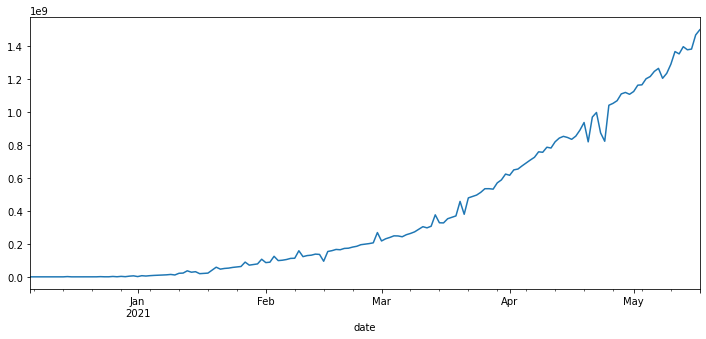

In [35]:
timeseries['total_vaccinations'].plot(figsize=(12,5))

#### What can bee seen, is that despite some days the amount of vaccinated people falls, the vaccination has strong long uptrend.


# Timeseries transformations to make it stationary

#### Testing For Stationarity using Dickey-Fuller Test

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [38]:
adfuller_test(timeseries['total_vaccinations'])

ADF Test Statistic : 6.240511150727797
p-value : 1.0
#Lags Used : 5
Number of Observations Used : 157
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [39]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [40]:
stepwise_fit = auto_arima(timeseries['total_vaccinations'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  163
Model:               SARIMAX(3, 2, 4)   Log Likelihood               -2985.778
Date:                Sat, 26 Jun 2021   AIC                           5987.557
Time:                        16:25:41   BIC                           6012.208
Sample:                             0   HQIC                          5997.566
                                - 163                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2107      0.111    -10.897      0.000      -1.428      -0.993
ar.L2         -0.8227      0.104     -7.922      0.000      -1.026      -0.619
ar.L3         -0.1497      0.089     -1.674      0.094      -0.325       0.026
ma.L1         -0.2771      0.122     -2.275      0.023      -0.516      -0.038
ma.L2         -0.7653      0.125     -6.117      0.000      -1.010      -0.520
ma.L3         -0.4200      0.106     -3.976      0.000      -0.627      -0.213
ma.L4          0.5816      0.107      5.433      0.000       0.372       0.791
sigma2      8.429e+14    1.6e-16   5.27e+30      0.000    8.43e+14    8.43e+14
===================================================================================
Ljung-Box (Q):                       36.54   Jarque-Bera (JB):               136.86
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):              34.03   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.18e+46. Standard errors may be unstable.
"""

### p=3 as given by auto Arima
### Considering past 3 days values data for making predictions

In [41]:
timeseries['Vaccinations_LastDay']=timeseries['total_vaccinations'].shift(+1)
timeseries['Vaccinations_SecondLastDay']=timeseries['total_vaccinations'].shift(+2)
timeseries['Vaccinations_ThirdLastDay']=timeseries['total_vaccinations'].shift(+3)
timeseries

,total_vaccinations,Vaccinations_LastDay,Vaccinations_SecondLastDay,Vaccinations_ThirdLastDay
date,,,,
2020-12-06,2.000000e+00,NaN,NaN,NaN
2020-12-07,4.000000e+00,2.000000e+00,NaN,NaN
2020-12-08,4.000000e+00,4.000000e+00,2.000000e+00,NaN
2020-12-09,5.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00
2020-12-10,6.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00
...,...,...,...,...
2021-05-13,1.394810e+09,1.351184e+09,1.365232e+09,1.288478e+09
2021-05-14,1.376011e+09,1.394810e+09,1.351184e+09,1.365232e+09
2021-05-15,1.380323e+09,1.376011e+09,1.394810e+09,1.351184e+09


In [42]:
timeseries=timeseries.dropna()
timeseries

,total_vaccinations,Vaccinations_LastDay,Vaccinations_SecondLastDay,Vaccinations_ThirdLastDay
date,,,,
2020-12-09,5.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00
2020-12-10,6.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00
2020-12-11,6.000000e+00,6.000000e+00,5.000000e+00,4.000000e+00
2020-12-12,6.000000e+00,6.000000e+00,6.000000e+00,5.000000e+00
2020-12-13,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
...,...,...,...,...
2021-05-13,1.394810e+09,1.351184e+09,1.365232e+09,1.288478e+09
2021-05-14,1.376011e+09,1.394810e+09,1.351184e+09,1.365232e+09
2021-05-15,1.380323e+09,1.376011e+09,1.394810e+09,1.351184e+09


### Importing Models

In [43]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [44]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

### Taking previous 3 values in the timestamp of x as 3 features
### x1,x2 & x3 are considered as inputs
### y as output

In [45]:
import numpy as np
x1,x2,x3,y=timeseries['Vaccinations_LastDay'],timeseries['Vaccinations_SecondLastDay'],timeseries['Vaccinations_ThirdLastDay'],timeseries['total_vaccinations']
x1,x2,x3=np.array(x1),np.array(x2),np.array(x3)#,np.array(y)
x1,x2,x3=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1)#,y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
final_x

array([[4.00000000e+00, 4.00000000e+00, 2.00000000e+00],
       [5.00000000e+00, 4.00000000e+00, 4.00000000e+00],
       [6.00000000e+00, 5.00000000e+00, 4.00000000e+00],
       [6.00000000e+00, 6.00000000e+00, 5.00000000e+00],
       [6.00000000e+00, 6.00000000e+00, 6.00000000e+00],
       [6.00000000e+00, 6.00000000e+00, 6.00000000e+00],
       [1.10000000e+01, 6.00000000e+00, 6.00000000e+00],
       [1.52922900e+06, 1.10000000e+01, 6.00000000e+00],
       [3.02900000e+03, 1.52922900e+06, 1.10000000e+01],
       [7.20800000e+03, 3.02900000e+03, 1.52922900e+06],
       [1.11800000e+04, 7.20800000e+03, 3.02900000e+03],
       [1.19610000e+04, 1.11800000e+04, 7.20800000e+03],
       [5.76372000e+05, 1.19610000e+04, 1.11800000e+04],
       [6.67292000e+05, 5.76372000e+05, 1.19610000e+04],
       [1.55530000e+05, 6.67292000e+05, 5.76372000e+05],
       [1.22184400e+06, 1.55530000e+05, 6.67292000e+05],
       [3.11955000e+05, 1.22184400e+06, 1.55530000e+05],
       [3.52672000e+05, 3.11955

In [46]:
y = pd.DataFrame(y)
y

,total_vaccinations
date,
2020-12-09,5.000000e+00
2020-12-10,6.000000e+00
2020-12-11,6.000000e+00
2020-12-12,6.000000e+00
2020-12-13,6.000000e+00
...,...
2021-05-13,1.394810e+09
2021-05-14,1.376011e+09
2021-05-15,1.380323e+09


## Splitting data for training and testing

In [47]:
X_train,X_test,y_train,y_test=final_x[:],final_x[:],y[:],y[:]

In [48]:
RF_model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

LinearRegression()

## Random Forest Model

In [49]:
#Random Forest
#Preparing dataframe for the whole timeperiod with time as index and Predictions as one column.
rf_pred=RF_model.predict(X_test)
rf_list_pred = []
for item in rf_pred:
    rf_list_pred.append(item)
rf_list_pred
#Creating dataframe with columns index,predicted values for plotting
index_future_dates=pd.date_range(start='2020-12-09',end='2021-05-17')
#print(index_future_dates)
data = {'idx':index_future_dates,
        'Predictions':rf_list_pred}
rf_pred_df = pd.DataFrame(data)
rf_pred_df.set_index('idx',inplace = True)
rf_pred_df

,Predictions
idx,
2020-12-09,5.370000e+00
2020-12-10,5.890000e+00
2020-12-11,5.995000e+00
2020-12-12,6.117535e+04
2020-12-13,1.070542e+05
...,...
2021-05-13,1.389425e+09
2021-05-14,1.398698e+09
2021-05-15,1.403129e+09


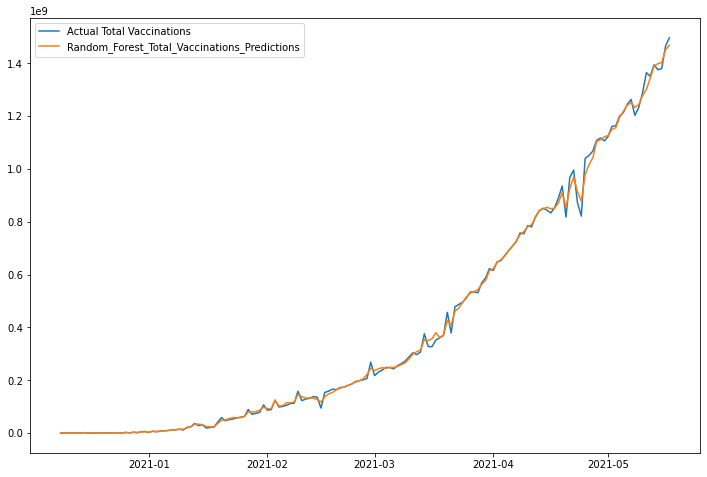

In [50]:
#Plot random forest predictions
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(y,label='Actual Total Vaccinations')
plt.plot(rf_pred_df,label='Random_Forest_Total_Vaccinations_Predictions')
plt.legend(loc="upper left")
plt.show()

## Linear Regression Model

In [51]:
#Linear model starts
#Preparing dataframe for the whole timeperiod with time as index and Predictions as one column.
lin_pred=lin_model.predict(X_test)
lin_pred
lin_list_pred = []
for item in lin_pred:
    lin_list_pred.append(item[0])
lin_list_pred
#Creating dataframe with columns index,predicted values for plotting
index_future_dates=pd.date_range(start='2020-12-09',end='2021-05-17')
#print(index_future_dates)
data = {'idx':index_future_dates,
        'Predictions':lin_list_pred}
lin_pred_df = pd.DataFrame(data)
lin_pred_df.set_index('idx',inplace = True)
lin_pred_df

,Predictions
idx,
2020-12-09,5.244851e+06
2020-12-10,5.244852e+06
2020-12-11,5.244853e+06
2020-12-12,5.244853e+06
2020-12-13,5.244854e+06
...,...
2021-05-13,1.371823e+09
2021-05-14,1.428781e+09
2021-05-15,1.414325e+09


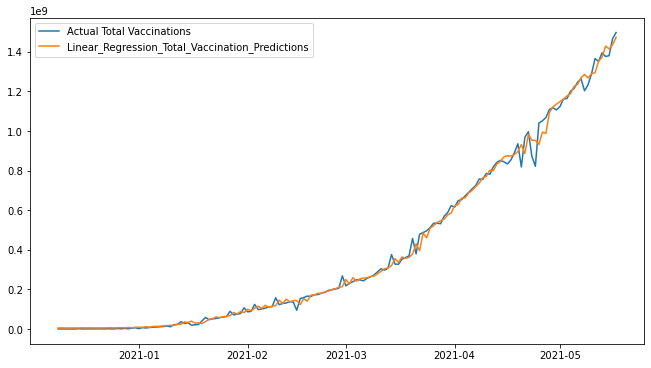

In [52]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(y,label='Actual Total Vaccinations')
plt.plot(lin_pred_df,label='Linear_Regression_Total_Vaccination_Predictions')
plt.legend(loc="upper left")
plt.show()

## Prediction Accuracy for both Models

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(rf_pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [54]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 14467627.274273073
Mean Squared Error for Linear Regression Model is: 28796900.131337088


## Forecasting for both models

### Linear Model forecasting for next 1 month

In [55]:
#Linear model next 30 days predictions
next30_pred_lin = []
last = timeseries['total_vaccinations'][-1]
secondLast = lin_pred[-1]
thirdLast = lin_pred[-2]
arr = np.array([last,secondLast,thirdLast])
arr_2d=arr.reshape(1, -1)
for i in range(30):
    #print(arr)
    curr_pred_val = lin_model.predict(arr_2d)
    next30_pred_lin.append(curr_pred_val[0][0])
    thirdLast = secondLast
    secondLast = last
    last = curr_pred_val[0]
    arr = np.array([last,secondLast,thirdLast])
    arr_2d=arr.reshape(1, -1)
next30_pred_lin

[1521054478.3597064,
 1552011159.4396443,
 1580467528.7311969,
 1607811596.7429724,
 1637654615.1523824,
 1667709032.9508324,
 1697502669.607283,
 1728264154.4974332,
 1759634795.810083,
 1791266921.6366906,
 1823495619.84092,
 1856329887.6153955,
 1889636777.8261423,
 1923491745.7290282,
 1957933860.9974637,
 1992929322.5976377,
 2028494699.926229,
 2064654697.950035,
 2101408661.4617953,
 2138764654.2245674,
 2176737924.3874216,
 2215336867.808509,
 2254570309.240037,
 2294450159.330958,
 2334987013.934309,
 2376191081.048262,
 2418073656.218025,
 2460646031.5557475,
 2503919375.997789,
 2547905270.0639606]

In [56]:
#Creating dataframe with columns index,predicted values for plotting
index_future_dates=pd.date_range(start='2021-05-17',end='2021-06-15')
print(index_future_dates)
data = {'idx':index_future_dates,
        'Predictions':next30_pred_lin}
lin_pred_df = pd.DataFrame(data)
lin_pred_df.set_index('idx',inplace = True)
lin_pred_df

DatetimeIndex(['2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20',
               '2021-05-21', '2021-05-22', '2021-05-23', '2021-05-24',
               '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
               '2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01',
               '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-05',
               '2021-06-06', '2021-06-07', '2021-06-08', '2021-06-09',
               '2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13',
               '2021-06-14', '2021-06-15'],
              dtype='datetime64[ns]', freq='D')


,Predictions
idx,
2021-05-17,1.521054e+09
2021-05-18,1.552011e+09
2021-05-19,1.580468e+09
2021-05-20,1.607812e+09
2021-05-21,1.637655e+09
2021-05-22,1.667709e+09
2021-05-23,1.697503e+09
2021-05-24,1.728264e+09
2021-05-25,1.759635e+09


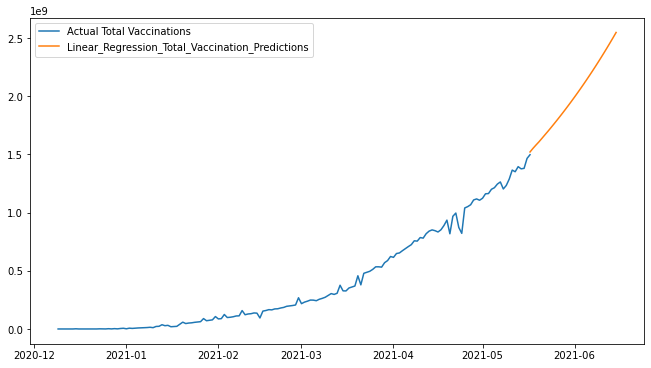

In [57]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(y,label='Actual Total Vaccinations')
plt.plot(lin_pred_df,label='Linear_Regression_Total_Vaccination_Predictions')
plt.legend(loc="upper left")
plt.show()

### Random Forest Model forecasting for next 1 month

In [58]:
#Random Forest model next 30 days predictions
next30_pred_RF = []
last = timeseries['total_vaccinations'][-1]
secondLast = rf_pred[-1]
thirdLast = rf_pred[-2]
arr = np.array([last,secondLast,thirdLast])
arr_2d=arr.reshape(1, -1)
for i in range(30):
    curr_pred_val = RF_model.predict(arr_2d)
    next30_pred_RF.append(curr_pred_val[0])
    thirdLast = secondLast
    secondLast = last
    last = curr_pred_val[0]
    arr = np.array([last,secondLast,thirdLast])
    arr_2d=arr.reshape(1, -1)
print(next30_pred_RF)

[1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86, 1474884743.86]


In [59]:
#Creating dataframe with columns index,predicted values for plotting
index_future_dates=pd.date_range(start='2021-05-17',end='2021-06-15')
print(index_future_dates)
data = {'idx':index_future_dates,
        'Predictions':next30_pred_RF}
RF_pred_df = pd.DataFrame(data)
RF_pred_df.set_index('idx',inplace = True)
RF_pred_df

DatetimeIndex(['2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20',
               '2021-05-21', '2021-05-22', '2021-05-23', '2021-05-24',
               '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
               '2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01',
               '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-05',
               '2021-06-06', '2021-06-07', '2021-06-08', '2021-06-09',
               '2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13',
               '2021-06-14', '2021-06-15'],
              dtype='datetime64[ns]', freq='D')


,Predictions
idx,
2021-05-17,1.474885e+09
2021-05-18,1.474885e+09
2021-05-19,1.474885e+09
2021-05-20,1.474885e+09
2021-05-21,1.474885e+09
2021-05-22,1.474885e+09
2021-05-23,1.474885e+09
2021-05-24,1.474885e+09
2021-05-25,1.474885e+09


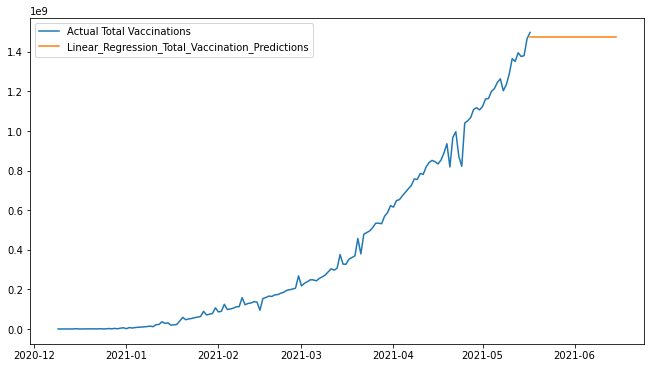

In [60]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(y,label='Actual Total Vaccinations')
plt.plot(RF_pred_df,label='Linear_Regression_Total_Vaccination_Predictions')
plt.legend(loc="upper left")
plt.show()